In [151]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-apr-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2021/train.csv
/kaggle/input/tabular-playground-series-apr-2021/test.csv


In [152]:
train_df = pd.read_csv("../input/tabular-playground-series-apr-2021/train.csv")
test_df = pd.read_csv("../input/tabular-playground-series-apr-2021/test.csv")
submission = pd.read_csv("../input/tabular-playground-series-apr-2021/sample_submission.csv")

In [153]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [154]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C
...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,3,"Cash, Cheryle",female,27.0,0,0,7686,10.12,NaN,Q
99996,199996,1,"Brown, Howard",male,59.0,1,0,13004,68.31,NaN,S
99997,199997,3,"Lightfoot, Cameron",male,47.0,0,0,4383317,10.87,NaN,S
99998,199998,1,"Jacobsen, Margaret",female,49.0,1,2,PC 26988,29.68,B20828,C


In [155]:
submission

,PassengerId,Survived
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1
...,...,...
99995,199995,1
99996,199996,1
99997,199997,1
99998,199998,1


In [156]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [157]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [158]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96513.000000,100000.000000,100000.00000,99867.000000
mean,149999.500000,2.368930,30.565796,0.486550,0.49283,45.374804
std,28867.657797,0.878458,14.054634,0.771262,0.92360,65.204725
min,100000.000000,1.000000,0.080000,0.000000,0.00000,0.050000
25%,124999.750000,1.000000,21.000000,0.000000,0.00000,10.130000
50%,149999.500000,3.000000,27.000000,0.000000,0.00000,13.980000
75%,174999.250000,3.000000,40.000000,1.000000,1.00000,37.390000
max,199999.000000,3.000000,81.000000,8.000000,9.00000,680.700000


In [159]:
train_df["Sex"].value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

In [160]:
train_df["Cabin"].value_counts()

C19828    6
B18148    5
C19623    5
C12388    5
B11110    5
         ..
B16253    1
F7937     1
C2839     1
A12651    1
C15839    1
Name: Cabin, Length: 26992, dtype: int64

In [161]:
train_df["Embarked"].value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

In [162]:
train_df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [163]:
test_df.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age             3487
SibSp              0
Parch              0
Ticket          5181
Fare             133
Cabin          70831
Embarked         277
dtype: int64

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
plt.style.use("ggplot")

In [166]:
train_df[["Survived", "Embarked", "PassengerId"]]

,Survived,Embarked,PassengerId
0,1,S,0
1,0,S,1
2,0,S,2
3,0,S,3
4,1,S,4
...,...,...,...
99995,1,C,99995
99996,0,S,99996
99997,0,S,99997
99998,0,S,99998


In [167]:
train_df[["Survived", "Embarked", "PassengerId"]].dropna()

,Survived,Embarked,PassengerId
0,1,S,0
1,0,S,1
2,0,S,2
3,0,S,3
4,1,S,4
...,...,...,...
99995,1,C,99995
99996,0,S,99996
99997,0,S,99997
99998,0,S,99998


In [168]:
train_df[["Survived", "Embarked", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                5518
         1               16669
Q        0                2186
         1                3238
S        0               49394
         1               22745

In [169]:
embarked_df = train_df[["Survived","Embarked","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack()

In [170]:
embarked_df

PassengerId       
Survived           0      1
Embarked                   
C               5518  16669
Q               2186   3238
S              49394  22745

<AxesSubplot:xlabel='Embarked'>

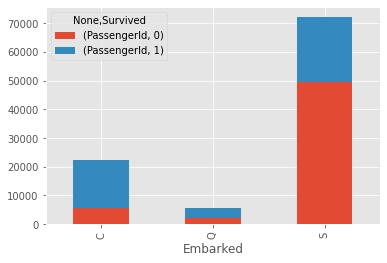

In [171]:
embarked_df.plot.bar(stacked=True)

In [172]:
embarked_df["survived_rate"]=embarked_df.iloc[:,0]/(embarked_df.iloc[:,0] + embarked_df.iloc[:,1])

In [173]:
embarked_df

PassengerId        survived_rate
Survived           0      1              
Embarked                                 
C               5518  16669      0.248704
Q               2186   3238      0.403024
S              49394  22745      0.684706

<AxesSubplot:xlabel='Sex'>

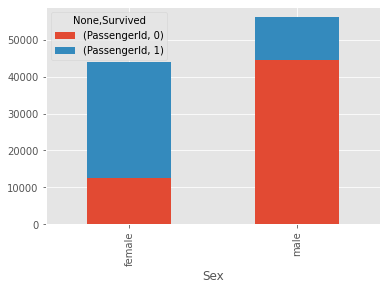

In [174]:
sex_df = train_df[["Sex","Survived","PassengerId"]].dropna().groupby(["Sex","Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

<AxesSubplot:xlabel='Pclass'>

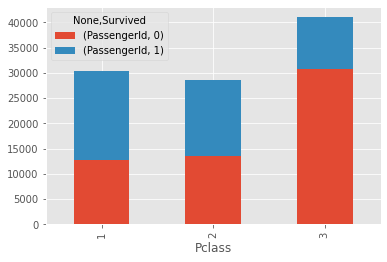

In [175]:
ticket_df = train_df[["Pclass","Survived","PassengerId"]].dropna().groupby(["Pclass","Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

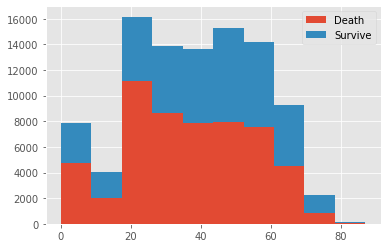

In [176]:
plt.hist((train_df[train_df["Survived"] == 0]["Age"].values, train_df[train_df["Survived"] == 1]["Age"].values), histtype="barstacked", bins=10, label=("Death","Survive"))
plt.legend()

In [177]:
train_df_corr = pd.get_dummies(train_df, columns=["Sex"],drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])

In [178]:
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,"Oconnor, Frankie",NaN,2,0,209245,27.14,C12239,1,0,0,1
1,1,0,3,"Bryan, Drew",NaN,0,0,27323,13.35,NaN,1,0,0,1
2,2,0,3,"Owens, Kenneth",0.33,1,2,CA 457703,71.29,NaN,1,0,0,1
3,3,0,3,"Kramer, James",19.00,0,0,A. 10866,13.04,NaN,1,0,0,1
4,4,1,3,"Bond, Michael",25.00,0,0,427635,7.76,NaN,1,0,0,1


In [179]:
train_corr = train_df_corr.corr()

In [180]:
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,0.001956,-0.000893,-0.002654,0.001000,0.000411,-0.001036,0.000493,0.004279,-0.003042,-0.002929
Survived,0.001956,1.000000,-0.289723,0.103895,-0.007587,0.023352,0.187534,-0.507260,0.349209,0.081917,-0.365716
Pclass,-0.000893,-0.289723,1.000000,-0.259109,-0.051436,-0.041848,-0.417354,0.198617,-0.288068,-0.184565,0.360727
Age,-0.002654,0.103895,-0.259109,1.000000,-0.112459,-0.125535,0.109164,-0.081684,0.101906,0.153130,-0.172093
SibSp,0.001000,-0.007587,-0.051436,-0.112459,1.000000,0.213126,0.059358,-0.030627,-0.019017,-0.030716,0.033464
Parch,0.000411,0.023352,-0.041848,-0.125535,0.213126,1.000000,0.061443,-0.087666,0.014203,-0.007879,-0.009520
Fare,-0.001036,0.187534,-0.417354,0.109164,0.059358,0.061443,1.000000,-0.143554,0.211916,0.101361,-0.248126
Sex_male,0.000493,-0.507260,0.198617,-0.081684,-0.030627,-0.087666,-0.143554,1.000000,-0.293367,-0.130933,0.339000
Embarked_C,0.004279,0.349209,-0.288068,0.101906,-0.019017,0.014203,0.211916,-0.293367,1.000000,-0.127877,-0.859231
Embarked_Q,-0.003042,0.081917,-0.184565,0.153130,-0.030716,-0.007879,0.101361,-0.130933,-0.127877,1.000000,-0.385351


<AxesSubplot:>

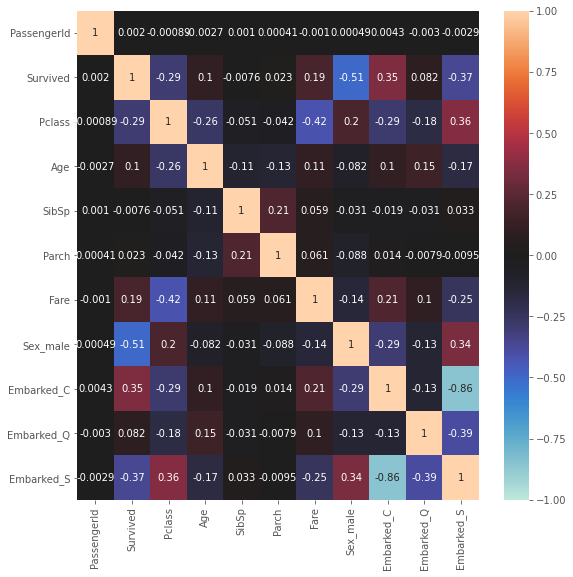

In [181]:
plt.figure(figsize=(9, 9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

In [182]:
all_df = pd.concat([train_df, test_df],sort=False).reset_index(drop=True)

In [183]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1.0,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0.0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0.0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0.0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1.0,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,NaN,3,"Cash, Cheryle",female,27.00,0,0,7686,10.12,NaN,Q
199996,199996,NaN,1,"Brown, Howard",male,59.00,1,0,13004,68.31,NaN,S
199997,199997,NaN,3,"Lightfoot, Cameron",male,47.00,0,0,4383317,10.87,NaN,S
199998,199998,NaN,1,"Jacobsen, Margaret",female,49.00,1,2,PC 26988,29.68,B20828,C


In [184]:
all_df.isnull().sum()

PassengerId         0
Survived       100000
Pclass              0
Name                0
Sex                 0
Age              6779
SibSp               0
Parch               0
Ticket           9804
Fare              267
Cabin          138697
Embarked          527
dtype: int64

In [185]:
Fare_mean = all_df[["Pclass","Fare"]].groupby("Pclass").mean().reset_index()

In [186]:
Fare_mean.columns = ["Pclass","Fare_mean"]

In [187]:
Fare_mean

,Pclass,Fare_mean
0,1,103.307086
1,2,25.602729
2,3,19.497302


In [188]:
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean",axis=1)

In [189]:
all_df["Name"].head()

0    Oconnor, Frankie
1         Bryan, Drew
2      Owens, Kenneth
3       Kramer, James
4       Bond, Michael
Name: Name, dtype: object

In [190]:
all_df['Age'] = all_df['Age'].fillna(all_df['Age'].mean()) 

In [191]:
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]

In [192]:
all_df["family_num"].value_counts()

0     116448
1      30139
2      25289
3      19724
4       4151
5       2021
6       1184
9        397
10       242
7        162
8        157
13        46
11        26
12         7
17         4
14         3
Name: family_num, dtype: int64

In [193]:
all_df.loc[all_df["family_num"] ==0, "alone"] = 1
all_df["alone"].fillna(0, inplace=True)

In [194]:
all_df = all_df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [195]:
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_num,alone
0,1.0,1,male,34.464565,2,0,27.14,S,2,0.0
1,0.0,3,male,34.464565,0,0,13.35,S,0,1.0
2,0.0,3,male,0.330000,1,2,71.29,S,3,0.0
3,0.0,3,male,19.000000,0,0,13.04,S,0,1.0
4,1.0,3,male,25.000000,0,0,7.76,S,0,1.0
...,...,...,...,...,...,...,...,...,...,...
199995,NaN,3,female,27.000000,0,0,10.12,Q,0,1.0
199996,NaN,1,male,59.000000,1,0,68.31,S,1,0.0
199997,NaN,3,male,47.000000,0,0,10.87,S,0,1.0
199998,NaN,1,female,49.000000,1,2,29.68,C,3,0.0


In [196]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_num,alone
0,1.0,1,male,34.464565,2,0,27.14,S,2,0.0
1,0.0,3,male,34.464565,0,0,13.35,S,0,1.0
2,0.0,3,male,0.330000,1,2,71.29,S,3,0.0
3,0.0,3,male,19.000000,0,0,13.04,S,0,1.0
4,1.0,3,male,25.000000,0,0,7.76,S,0,1.0


In [197]:
from sklearn.preprocessing import LabelEncoder

In [198]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['Sex', 'Embarked'], dtype='object')


In [199]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtype == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked


In [200]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_num,alone
0,1.0,1,1,34.464565,2,0,27.14,2,2,0.0
1,0.0,3,1,34.464565,0,0,13.35,2,0,1.0
2,0.0,3,1,0.330000,1,2,71.29,2,3,0.0
3,0.0,3,1,19.000000,0,0,13.04,2,0,1.0
4,1.0,3,1,25.000000,0,0,7.76,2,0,1.0


In [209]:
train_X = all_df[:100000].drop("Survived",axis=1)
train_Y = train_df["Survived"]
test_X = all_df[100000:].drop("Survived",axis=1)

In [210]:
test_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_num,alone
100000,3,1,19.0,0,0,63.01,2,0,1.0
100001,3,0,53.0,0,0,5.81,2,0,1.0
100002,1,0,19.0,0,0,38.91,0,0,1.0
100003,2,1,25.0,0,0,12.93,2,0,1.0
100004,1,0,17.0,0,2,26.89,0,2,0.0


In [215]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [216]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2)

In [217]:
categories = ["Embarked", "Pclass", "Sex", "alone"]

In [218]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [219]:
lgbm_params = {
    "objective":"binary",
    "random_seed":1234
}

In [220]:
model_lgb = lgb.train(lgbm_params,
                     lgb_train,
                     valid_sets=lgb_eval,
                     num_boost_round=100,
                     early_stopping_rounds=20,
                     verbose_eval=10)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Number of positive: 34171, number of negative: 45829
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.427138 -> initscore=-0.293540
[LightGBM] [Info] Start training from score -0.293540
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.524098
[20]	valid_0's binary_logloss: 0.496871
[30]	valid_0's binary_logloss: 0.491508
[40]	valid_0's binary_logloss: 0.490031
[50]	valid_0's binary_logloss: 0.489536
[60]	valid_0's binary_logloss: 0.489507
[70]	valid_0's binary_logloss: 0.48954
[80]	valid_0's binary_logloss: 0.489678
Early stopping, best iteration is:
[62]	valid_0's binary_logl

In [221]:
model_lgb.feature_importance()

array([167,  50, 363, 164, 182, 683, 175,  74,   2], dtype=int32)

<AxesSubplot:>

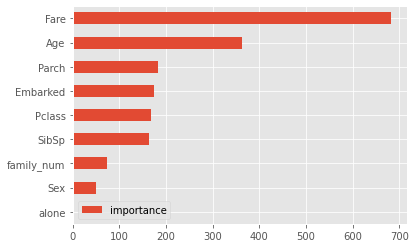

In [222]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending=True)
importance.plot.barh()

In [223]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [224]:
from sklearn.metrics import accuracy_score

In [225]:
accuracy_score(y_valid, np.round(y_pred))

0.76895

In [226]:
lgbm_params = {
    "objective":"binary",
    "max_bin":331,
    "num_leaves":20,
    "min_data_in_leaf":57,
    "andom_seed":1234    
}

In [227]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [228]:
model_lgb = lgb.train(lgbm_params,
                     lgb_train,
                     valid_sets=lgb_eval,
                     num_boost_round=100,
                     early_stopping_rounds=20,
                     verbose_eval=10)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] Number of positive: 34171, number of negative: 45829
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 9
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.427138 -> initscore=-0.293540
[LightGBM] [Info] Start training from score -0.293540
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.525664
[20]	valid_0's binary_logloss: 0.498497
[30]	valid_0's binary_logloss: 0.492769
[40]	valid_0's binary_logloss: 0.490888
[50]	valid_0's binary_logloss: 0.490048
[60]	valid_0's binary_loglo

In [229]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [230]:
accuracy_score(y_valid, np.round(y_pred))

0.7672

In [231]:
folds = 3

kf = KFold(n_splits=folds)

In [233]:
models = []

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                         lgb_train,
                         valid_sets=lgb_eval,
                         num_boost_round=100,
                         early_stopping_rounds=20,
                         verbose_eval=10
                         )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    print(accuracy_score(y_valid, np.round(y_pred)))
    
    models.append(model_lgb)

[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] Number of positive: 28466, number of negative: 38200
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 525
[LightGBM] [Info] Number of data points in the train set: 66666, number of used features: 9
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.426994 -> initscore=-0.294125
[LightGBM] [Info] Start training from score -0.294125
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.524018
[20]	valid_0's binary_logloss: 0.495466
[30]	valid_0's binary_logloss: 0.489033
[40]	valid_0's binary_logloss: 0.486798
[50]	valid_0's binary_logloss: 0.485919
[60]	valid_0's binary_loglo

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[20]	valid_0's binary_logloss: 0.493605
[30]	valid_0's binary_logloss: 0.486856
[40]	valid_0's binary_logloss: 0.484489
[50]	valid_0's binary_logloss: 0.483358
[60]	valid_0's binary_logloss: 0.482812
[70]	valid_0's binary_logloss: 0.482704
[80]	valid_0's binary_logloss: 0.482647
[90]	valid_0's binary_logloss: 0.482707
Early stopping, best iteration is:
[75]	valid_0's binary_logloss: 0.482611
0.7715177151771517


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] Number of positive: 28472, number of negative: 38195
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 525
[LightGBM] [Info] Number of data points in the train set: 66667, number of used features: 9
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.427078 -> initscore=-0.293783
[LightGBM] [Info] Start training from score -0.293783
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.523938
[20]	valid_0's binary_logloss: 0.495979
[30]	valid_0's binary_logloss: 0.489979
[40]	valid_0's binary_logloss: 0.487943
[50]	valid_0's binary_logloss: 0.487099
[60]	valid_0's binary_loglo

In [234]:
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [235]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [236]:
preds_int = (preds_mean > 0.5).astype(int)

In [237]:
submission["Survived"] = preds_int

In [238]:
submission

,PassengerId,Survived
0,100000,0
1,100001,1
2,100002,1
3,100003,0
4,100004,1
...,...,...
99995,199995,1
99996,199996,0
99997,199997,0
99998,199998,1


In [239]:
submission.to_csv("tabular_apr21_submit01.csv",index=False)